<a href="https://colab.research.google.com/github/justacoderq/Exploratory-Data-Analysis-Projects/blob/main/Assassination_and_Democracy_Uncovering_Causal_Mechanisms_with_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 2500 - Module Assignment 5

# Exploratary Data Analysis for Alternative Causal Mechanism Using Assasination Article/Data

Article: "Hit or Miss? The Effect of Assassinations on Institutions and War"

Author : Prachi Aswani

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import probplot

import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

# 1. Data Anlaysis Question

# *Primary Claim*
On average, successful assasinations of autocrats produces sustained moves towards democracy

# *Alternative Claim*
The level of democracy of a country is the result of multiple causal factors the political regime before the leader's assassination attempt, and the occurrence of interwar periods before the leader's assassination attempt.

(Note: Explanations mentioned in the write up)

# 2. Read in your data

From github leaders csv

In [ ]:
assassination_df = pd.read_csv("https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/main/Module_Assignment-5/Hit_or_Miss_The_Effect_of_Assassinations_on_Institutions_and_War/leaders.csv")

# 3. Check the packaging

In [ ]:
assassination_df.shape

(250, 11)

# 4. Look at the top and bottom of data

In [ ]:
assassination_df.head()

,year,country,leadername,age,politybefore,polityafter,interwarbefore,interwarafter,civilwarbefore,civilwarafter,result
0,1929,Afghanistan,Habibullah Ghazi,39,-6.0,-6.000000,0,0,1,0,not wounded
1,1933,Afghanistan,Nadir Shah,53,-6.0,-7.333333,0,0,0,0,dies within a day after the attack
2,1934,Afghanistan,Hashim Khan,50,-6.0,-8.000000,0,0,0,0,"survives, whether wounded unknown"
3,1924,Albania,Zogu,29,0.0,-9.000000,0,0,0,0,wounded lightly
4,1931,Albania,Zogu,36,-9.0,-9.000000,0,0,0,0,not wounded


In [ ]:
assassination_df.tail()

,year,country,leadername,age,politybefore,polityafter,interwarbefore,interwarafter,civilwarbefore,civilwarafter,result
245,1968,Yemen North,Al-Iryani,51,-2.000000,-3.000000,0,0,1,1,not wounded
246,1977,Yemen North,Al-Hamadi,34,-4.000000,-6.000000,0,0,0,0,"dies, timing unknown"
247,1977,Yemen North,Al-Ghashmi,38,-4.000000,-6.000000,0,0,0,0,plot stopped
248,1978,Yemen North,Al-Ghashmi,39,-4.666667,-6.000000,0,0,0,0,dies within a day after the attack
249,1934,Yugoslavia,Alexander,46,-10.000000,-7.666667,0,0,0,0,dies within a day after the attack


# 5. Data Cleaning

# Checking for Missing Values

In [ ]:
# Number of missing values in each column
assassination_df.isnull().sum().sort_values(ascending=False)

year              0
country           0
leadername        0
age               0
politybefore      0
polityafter       0
interwarbefore    0
interwarafter     0
civilwarbefore    0
civilwarafter     0
result            0
dtype: int64

I want to find out if the assasination is succesful or not , so I create a column using the results column

In [ ]:
assassination_df.columns

Index(['year', 'country', 'leadername', 'age', 'politybefore', 'polityafter',
       'interwarbefore', 'interwarafter', 'civilwarbefore', 'civilwarafter',
       'result'],
      dtype='object')

In [ ]:
def is_successful(result):
  # If dies - succesful assassination
    if "dies" in result:
        return 1  # Successful assassination
    else:
        return 0  # Unsuccessful assassination

assassination_df['successful_assassination'] = assassination_df['result'].apply(is_successful)
# If successful 1 , otherwise 0

In [ ]:
# Checks if column created
assassination_df.head()

,year,country,leadername,age,politybefore,polityafter,interwarbefore,interwarafter,civilwarbefore,civilwarafter,result,successful_assassination
0,1929,Afghanistan,Habibullah Ghazi,39,-6.0,-6.000000,0,0,1,0,not wounded,0
1,1933,Afghanistan,Nadir Shah,53,-6.0,-7.333333,0,0,0,0,dies within a day after the attack,1
2,1934,Afghanistan,Hashim Khan,50,-6.0,-8.000000,0,0,0,0,"survives, whether wounded unknown",0
3,1924,Albania,Zogu,29,0.0,-9.000000,0,0,0,0,wounded lightly,0
4,1931,Albania,Zogu,36,-9.0,-9.000000,0,0,0,0,not wounded,0


In [ ]:
assassination_df.columns

Index(['year', 'country', 'leadername', 'age', 'politybefore', 'polityafter',
       'interwarbefore', 'interwarafter', 'civilwarbefore', 'civilwarafter',
       'result', 'successful_assassination'],
      dtype='object')

# 6. Check the "n"s

There should be around 88 countries

In [ ]:
# Number of countries
countries = set(assassination_df['country'])
countries_length = len(countries)
print(countries)
print(countries_length)

{'Algeria', 'Bolivia', 'Niger', 'Georgia', 'Uruguay', 'Ivory Coast', 'Chad', 'Senegal', 'Guinea', 'Cambodia', 'Rwanda', 'Sweden', 'Sudan', 'Haiti', 'Israel', 'Somalia', 'Korea South', 'India', 'Congo Brazzaville', 'Peru', 'France', 'Cyprus', 'Pakistan', 'Guatemala', 'Saudi Arabia', 'Yemen North', 'Honduras', 'Netherlands', 'Portugal', 'Iran', 'Mexico', 'Togo', 'Ethiopia', 'Libya', 'Lebanon', 'Sri Lanka', 'Austria', 'Panama', 'Uzbekistan', 'Nepal', 'Madagascar', 'Kuwait', 'Cuba', 'Egypt', 'Venezuela', 'Afghanistan', 'Colombia', 'Ecuador', 'Myanmar (Burma)', 'Bulgaria', 'Kenya', 'Uganda', 'Iraq', 'Syria', 'Liberia', 'United States', 'China', 'Greece', 'United Kingdom', 'Spain', 'Jordan', 'Nicaragua', 'Albania', 'Czechoslovakia', 'Indonesia', 'Australia', 'Japan', 'Bhutan', 'Ghana', 'Turkey', 'Poland', 'South Africa', 'Burundi', 'Belgium', 'Chile', 'Yugoslavia', 'Costa Rica', 'Brazil', 'El Salvador', 'Argentina', 'Dominican Rep', 'Vietnam South', 'Oman', 'Canada', 'Italy', 'Russia', 'Germ

The country with the highest number of leaders should be Japan and Mexico.

In [ ]:
country_counts = assassination_df['country'].value_counts()
country_counts

country
Japan            11
Mexico           11
France           10
Russia           10
United States     8
                 ..
Oman              1
Panama            1
Colombia          1
Chad              1
Yugoslavia        1
Name: count, Length: 88, dtype: int64

The year range should be from 1878 to 2001

In [ ]:
# Date range
min_year = assassination_df['year'].min()
max_year = assassination_df['year'].max()

print("Year Range:", min_year, "to", max_year)

Year Range: 1878 to 2001


There should be leader of ages ranging from 18 to 81 years

In [ ]:
# Minimum and maximum age of leaders
min_age = assassination_df['age'].min()
max_age = assassination_df['age'].max()

print("Age Range:", min_age, "to", max_age)

Age Range: 18 to 81


The polity scale which is a scale of democracy should be in the range of -10 (fully autocratic) to 10(fully democratic)

In [ ]:
# Minimum and maximum polity scores before the leader's assassination
min_politybefore = assassination_df['politybefore'].min()
max_politybefore = assassination_df['politybefore'].max()

# Minimum and maximum polity scores after the leader's assassination
min_polityafter = assassination_df['polityafter'].min()
max_polityafter = assassination_df['polityafter'].max()

print("Polity Before Range:", min_politybefore, "to", max_politybefore)
print("Polity After Range:", min_polityafter, "to", max_polityafter)


Polity Before Range: -10.0 to 10.0
Polity After Range: -10.0 to 10.0


# 7. Validate against an external knowledge or data source

The year is positive

In [ ]:
assassination_df['year'].min()

1878

The age is positive

In [ ]:
assassination_df['age'].min()

18

The columns interwarbefore, interwarafter, civilwarbefore, civilwarafter are all just 0 and 1 (categorical)

In [ ]:
pd.Categorical(assassination_df['interwarbefore']).unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
pd.Categorical(assassination_df['interwarafter']).unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
pd.Categorical(assassination_df['civilwarbefore']).unique()

[1, 0]
Categories (2, int64): [0, 1]

In [ ]:
pd.Categorical(assassination_df['civilwarafter']).unique()

[0, 1]
Categories (2, int64): [0, 1]

Is the distribution of polityafter typical?

In [ ]:
assassination_df['polityafter'].describe()

count    250.000000
mean      -1.650000
std        6.525638
min      -10.000000
25%       -7.000000
50%       -3.166667
75%        3.916667
max       10.000000
Name: polityafter, dtype: float64

The distribution of polityafter is right-skewed based on the summary statistics. The mean value of approximately -1.65 is less than the median value of -3.166667. This indicates that the majority of the data is concentrated towards the lower end of the distribution, with some extreme values pulling the mean towards the right. The standard deviation of approximately 6.53 suggests variability in the data points around the mean. Furthermore, the minimum value of -10 and the maximum value of 10 indicate a wide range of values, with some leaders experiencing significant changes in polity scores after their assassination. I cannot take the log of polityafter for doing linear regression as its rightly skewed because the polity scale contains negative numbers for which the log is not defined.

# 8. Make a plot

Making a sub df for the assasinations data frame with the coulmns needed to plot and perform tests on.

In [ ]:
cols = ['politybefore', 'polityafter', 'interwarbefore', 'interwarafter', 'civilwarbefore', 'civilwarafter' ]

# Make a new DataFrame with relevant columns
assassination_subdf = assassination_df[cols + ['successful_assassination']].copy()

# Describe the values in each column
assassination_subdf.describe()

,politybefore,polityafter,interwarbefore,interwarafter,civilwarbefore,civilwarafter,successful_assassination
count,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.00000
mean,-1.518667,-1.650000,0.188000,0.148000,0.21600,0.184000,0.21600
std,6.445519,6.525638,0.391496,0.355812,0.41234,0.388261,0.41234
min,-10.000000,-10.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,-7.000000,-7.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,-3.000000,-3.166667,0.000000,0.000000,0.00000,0.000000,0.00000
75%,4.000000,3.916667,0.000000,0.000000,0.00000,0.000000,0.00000
max,10.000000,10.000000,1.000000,1.000000,1.00000,1.000000,1.00000


Correalte the columns for producing the plot

In [ ]:
# Only correlate the numeric columns
assassination_corr =  assassination_subdf.corr()
assassination_corr

,politybefore,polityafter,interwarbefore,interwarafter,civilwarbefore,civilwarafter,successful_assassination
politybefore,1.000000,0.828324,0.047816,-0.057454,-0.000995,0.019566,0.066500
polityafter,0.828324,1.000000,0.131078,0.015077,0.008109,-0.008084,0.071542
interwarbefore,0.047816,0.131078,1.000000,0.260743,-0.028660,0.009300,0.045975
interwarafter,-0.057454,0.015077,0.260743,1.000000,0.219204,0.209076,-0.109274
civilwarbefore,-0.000995,0.008109,-0.028660,0.219204,1.000000,0.428057,-0.086546
civilwarafter,0.019566,-0.008084,0.009300,0.209076,0.428057,1.000000,-0.048565
successful_assassination,0.066500,0.071542,0.045975,-0.109274,-0.086546,-0.048565,1.000000


<Axes: >

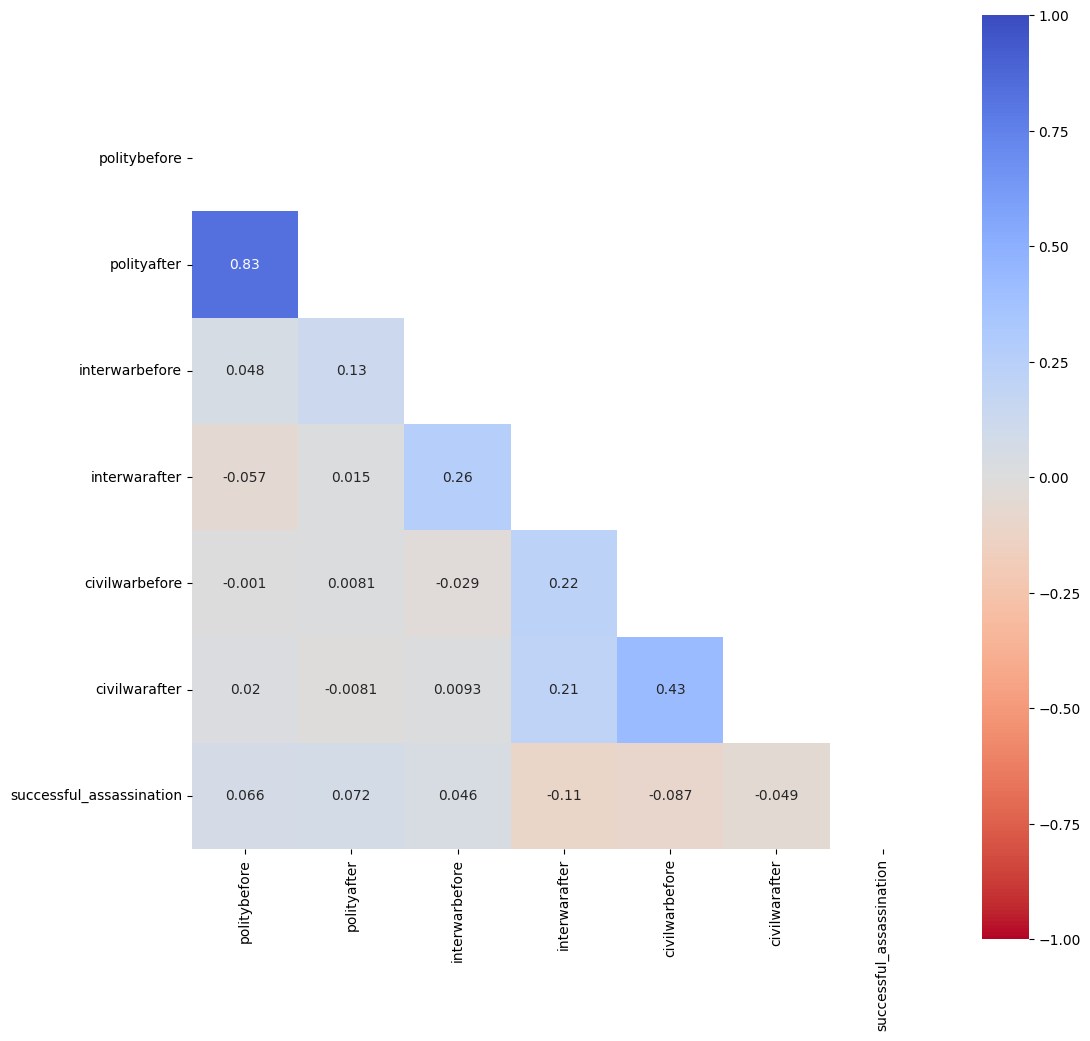

In [ ]:
assassination_mask = np.zeros_like(assassination_corr) #array of zeros of the same shape
assassination_mask[np.triu_indices_from(assassination_mask)] = True #turn upper triangle into ones

# Set up the plotting environment
f,ax = plt.subplots(1,1,figsize=(12,12))

# Make a heatmap, masking the upper triangle
sb.heatmap(assassination_corr,vmin=-1,vmax=1,mask=assassination_mask,annot=True,square=True,ax=ax,cmap='coolwarm_r')

The politybefore and polityafter are highly correlated with each other. Also the variable I'm trying to find significance such as interwarbefore and succesful assassination for comparing with primaryclaim also hold some significance

# Individual plots for each perdictor variable with polityafter

# Primary Claim : Succesful Assassination and polityafter Box Plot

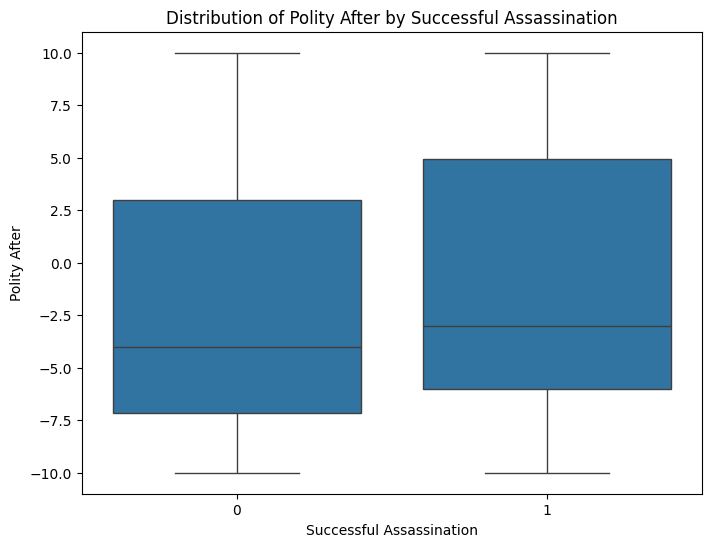

In [ ]:
# Box plot
plt.figure(figsize=(8, 6))
sb.boxplot(x='successful_assassination', y='polityafter', data=assassination_df)
plt.xlabel('Successful Assassination')
plt.ylabel('Polity After')
plt.title('Distribution of Polity After by Successful Assassination')
plt.show()

On average, successful assassinations tend to lead to higher levels of polity after scores meaning greater decrease in democracy compared to unsuccessful assassinations. Additionally, there appears to be more variability in polity after scores for unsuccessful assassinations compared to successful ones.

# Alternative Claim :

# politybefore and polityafter Scatter Plot

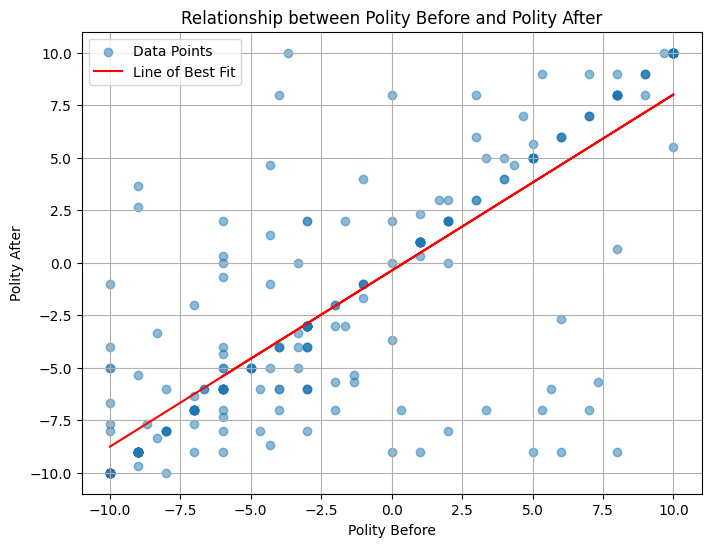

In [ ]:
# Extracting data
polity_before = assassination_df['politybefore']
polity_after = assassination_df['polityafter']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(polity_before, polity_after, alpha=0.5, label='Data Points')
plt.xlabel('Polity Before')
plt.ylabel('Polity After')
plt.title('Relationship between Polity Before and Polity After')

# Add a line of best fit
m, b = np.polyfit(polity_before, polity_after, 1)  # Fit a first-degree polynomial (linear regression)
plt.plot(polity_before, m * polity_before + b, color='red', label='Line of Best Fit')

# Display legend
plt.legend()

plt.grid(True)
plt.show()


"Polity Before" against "Polity After" plot suggests a linear relationship between these two variables. In this specific case, the line has a positive slope, indicating a positive correlation between the political regime before a leader's assassination attempt and the political regime after their tenure. Higher values of "Polity Before", representing a more democratic regime before the leader's assassination attempt, tend to be associated with higher values of "Polity After", indicating a sustained or improved level of democracy after the leader's assassination attempt.

# Alternative Claim:

#interwarbefore and polityafter plot

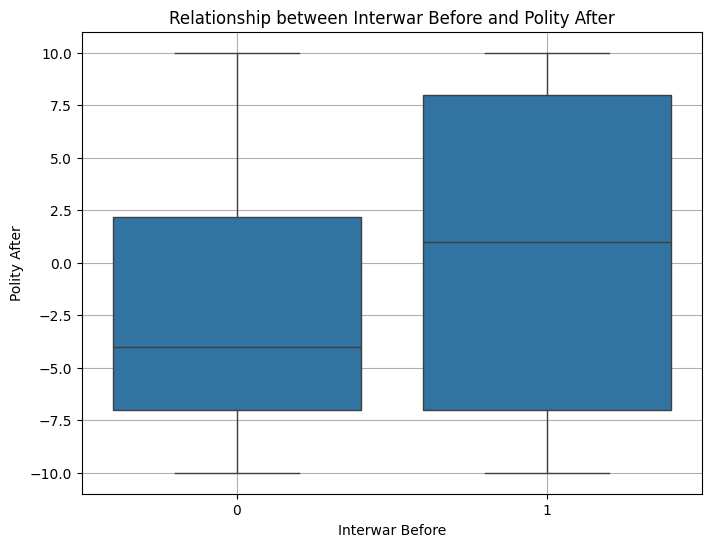

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='interwarbefore', y='polityafter', data=assassination_df)
plt.xlabel('Interwar Before')
plt.ylabel('Polity After')
plt.title('Relationship between Interwar Before and Polity After')
plt.grid(True)
plt.show()

The box plot indicates that if there was an interwar period before, the 'polityafter' tends to be higher. The relationship observed in the plot suggests that the presence of an interwar period may have a positive impact on the level of democracy or political stability afterward

# 9. Try an easy solution

Normal test

Normal Probabilit Plot

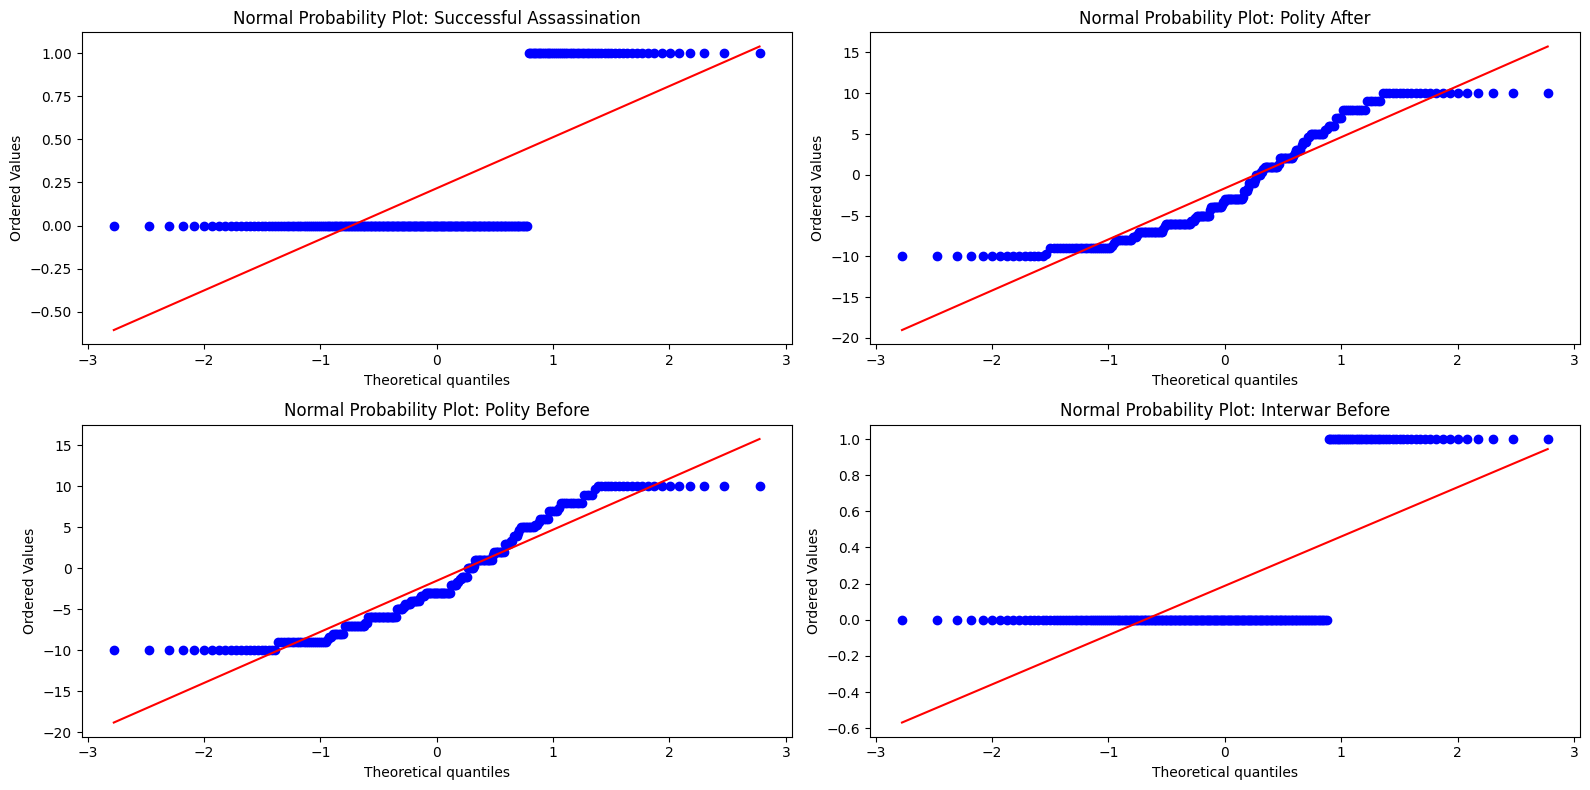

In [ ]:
# Create normal probability plots for 'successful_assassination', 'polityafter', 'politybefore', and 'interwarbefore'
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
probplot(assassination_df['successful_assassination'], plot=plt)
plt.title('Normal Probability Plot: Successful Assassination')

plt.subplot(2, 2, 2)
probplot(assassination_df['polityafter'], plot=plt)
plt.title('Normal Probability Plot: Polity After')

plt.subplot(2, 2, 3)
probplot(assassination_df['politybefore'], plot=plt)
plt.title('Normal Probability Plot: Polity Before')

plt.subplot(2, 2, 4)
probplot(assassination_df['interwarbefore'], plot=plt)
plt.title('Normal Probability Plot: Interwar Before')

plt.tight_layout()
plt.show()

successful_assassination and interwarbefore columns are not normally distributed, while politybefore and polityafter are roughly normally distributed.

# Linear Regression for Primary Claim

In [ ]:
# Specify the model relationship using column titles, make sure to also fit the model
primary_model = smf.ols(formula = 'polityafter ~ C(successful_assassination)',data=assassination_subdf).fit()

# Summarize the model
primary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            polityafter   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.276
Date:                Mon, 08 Apr 2024   Prob (F-statistic):              0.260
Time:                        20:50:44   Log-Likelihood:                -822.53
No. Observations:                 250   AIC:                             1649.
Df Residuals:                     248   BIC:                             1656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.8946      0.466     -4.067      0.000      -2.812      -0.977
C(successful_assassination)[T.1]     1.1322      1.002      1.130      0.260      -0.842       3.106
==============================================================================
Omnibus:                       78.342   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.700
Skew:                           0.499   Prob(JB):                     1.18e-05
Kurtosis:                       1.912   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This clearly shows coorelation doesn't imply causation, in the plot we saw that there was a correlation between succesful assassination and the polityafter whhich is the level of democracy or autocracy but when checking it's significance , it is not significant because the p value is not less than 5% and the R squared value is very small.

# Linear Regression for Alternative Claim

Hypothesis testing using Linear Regression

Two Tailed Test
$$
H_0: \text{No correlation between the political regime before , interwarbefore and the political rigime after , i.e., $p=0$}.
$$
$$
H_a: \text{Some correlation between the political regime before , interwarbefore and the political rigime after , i.e., $p≠0$}.
$$

Significance level is 5%(0.05)

In [ ]:
# Specify the model relationship using column titles, make sure to also fit the model
alternative_model = smf.ols(formula = 'polityafter ~ politybefore + C(interwarbefore)',data=assassination_subdf).fit()

# Summarize the model
alternative_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            polityafter   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     280.8
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           2.50e-64
Time:                        20:50:44   Log-Likelihood:                -674.94
No. Observations:                 250   AIC:                             1356.
Df Residuals:                     247   BIC:                             1366.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.6705      0.261     -2.569      0.011      -1.185      -0.156
C(interwarbefore)[T.1]     1.5282      0.587      2.604      0.010       0.372       2.684
politybefore               0.8342      0.036     23.402      0.000       0.764       0.904
==============================================================================
Omnibus:                       45.029   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.174
Skew:                          -0.591   Prob(JB):                     8.45e-47
Kurtosis:                       7.356   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Firstly, both 'politybefore' and 'interwarbefore' were found to be statistically significant predictors of 'polityafter', with coefficients of 0.8342 and 1.5282 and p value 0f 0.000 and 0.0010 which are both less than 0.05, respectively. This suggests that for each unit increase in 'politybefore' or 'interwarbefore', 'polityafter' is expected to increase by approximately 0.8342 units or 1.5282 units, holding other variables constant. The model's overall explanatory power was significant, with an R-squared value of 0.695, indicating that approximately 69.5% of the variance in 'polityafter' can be explained by the independent variables. Hence, we reject the null hypothesis and say they are indeed statistically significant.

# Write Up
Exploratory Data Analysis on Assassination data.

I have selected the article titled "Hit or Miss? The Effect of Assassinations on Institutions and War" which makes a strong causal claim regarding the impact of assassinations on political institutions and the likelihood of war. The primary argument of the article is that successful assassinations of autocratic leaders tend to result in sustained moves towards democracy. It suggests that the removal of autocratic leaders through assassination can lead to political reforms and democratization processes within countries. The article implies a direct causal relationship between successful assassinations and increased levels of democracy in affected nations.The primary causal mechanism being claimed in the article is that the successful assassination of autocratic leaders leads to sustained moves towards democracy within countries. The argument suggests that the removal of autocratic leaders creates opportunities for political reform and transition towards more democratic governance structures. It implies that the elimination of authoritarian figures through assassination acts as a catalyst for political change and democratization processes. The article posits that the absence of autocratic leaders enables the emergence of more democratic institutions and practices, ultimately resulting in greater political freedom and stability.

The Alternative casual relationship I have suggested is this- The level of democracy of a country is the result of multiple causal factors the political regime before the leader's assassination attempt, and the occurrence of interwar periods before the leader's assassination attempt.
The alternative claim presented suggests that the level of democracy in a country is influenced by multiple causal factors beyond just the occurrence of successful assassinations. Instead of attributing the movement towards democracy solely to the removal of autocratic leaders through assassination, the alternative claim proposes that other factors such as the political regime before the leader's assassination attempt and the occurrence of interwar periods also play significant roles. It argues that the level of democracy in a country is shaped by a complex interplay of various political and historical factors, rather than being solely determined by the outcome of assassination events.

To support my alternative causal relationship, I can utilize Hill's framework to argue for its superiority in explaining the observed relationship between the level of democracy in a country and various causal factors. Strength: My alternative claim suggests that the effect size of the relationship between the level of democracy and various causal factors, including the political regime before the leader's assassination attempt and the occurrence of interwar periods, could be substantial. While the effect of successful assassinations on democracy levels may indeed exist, it may not be as large as previously assumed when other factors are considered. By demonstrating the significant impact of multiple causal factors on democracy levels, including potential large effects from political regime dynamics and historical periods, my alternative claim strengthens the argument for a multifaceted explanation of democratization processes.Consistency: The alternative claim proposes that the relationship between democracy levels and multiple causal factors can be replicated across different countries and time periods. By conducting cross-national and longitudinal analyses, I can demonstrate that variations in democracy levels consistently correspond to changes in political regime types, occurrences of interwar periods, and other relevant factors. This consistency across diverse contexts strengthens the reproducibility of the alternative explanation, indicating that it provides a robust framework for understanding democratization processes.Specificity: My alternative claim aims to pinpoint the association between democracy levels and various causal factors, thereby minimizing the plausibility of alternative explanations. While the relationship between successful assassinations and democracy levels may lack specificity, the alternative claim identifies specific mechanisms such as the influence of political regime dynamics and historical periods on democratization. By elucidating these specific pathways, the alternative claim offers a more nuanced understanding of the factors driving changes in democracy levels, reducing the likelihood of alternative explanations.

Temporality: The alternative claim adheres to the principle that causes precede effects, ensuring that there is no "time traveling" in the causal pathway. By examining the sequence and timing of events such as changes in political regimes and occurrences of interwar periods relative to shifts in democracy levels, I can establish a clear temporal relationship between causal factors and their effects on democratization processes. This temporal coherence strengthens the credibility of the alternative explanation, ruling out potential confounding factors related to temporal sequencing.Gradient: I will investigate whether the strength of various causal factors correlates with the magnitude of their effects on democracy levels, thereby assessing the presence of a gradient. By examining how variations in political regime types or the intensity of interwar periods correspond to changes in democracy levels, I can determine whether stronger treatments result in greater effects on democratization. This analysis will provide insights into the dose-response relationship between causal factors and democracy levels, enhancing the robustness of the alternative explanation.Plausibility: The alternative claim posits that the causal mechanisms involving political regime dynamics, historical periods, and other factors are inherently plausible in driving changes in democracy levels. By drawing on theoretical frameworks from political science, history, and related disciplines, I can elucidate the underlying mechanisms through which these factors influence democratization processes. This plausibility strengthens the credibility of the alternative explanation, as it aligns with established theories and empirical evidence regarding democratization dynamics.Coherence: My alternative claim offers a coherent account of the multifaceted nature of democratization processes by integrating insights from various disciplines and bodies of evidence. By demonstrating compatibility with existing research on democratization, including studies on political regime change, historical transitions, and democratic consolidation, the alternative explanation provides a comprehensive understanding of the factors driving changes in democracy levels. This coherence enhances the explanatory power of the alternative claim, as it aligns with and builds upon existing knowledge in the field.Experiment: While experimental manipulation may not be feasible in this context, observational studies and comparative case analyses can replicate the effects observed in the alternative claim. By conducting rigorous empirical research using appropriate methodological approaches, I can assess the reproducibility of the alternative explanation across different contexts and settings. While experiments cannot directly reproduce historical events or political developments, they can provide valuable insights into the causal mechanisms underlying democratization processes, thereby supporting the validity of the alternative claim.In summary, my alternative claim offers a compelling explanation for variations in democracy levels by emphasizing the importance of multiple causal factors, including political regime dynamics and historical interwar
periods.

The variables that correspond to my alternative casual mechanism are politybefore and interwarbefore CAUSES polityafter. which alligns with the claim that says the poltical regime or level of democracy before and interwar before the assassination attempt CAUSES the political regime after which the level of democracy. I have employed heat map correlation and Linear regression to further assess my claim.

I started off with loading the data from the provided CSV file using Pandas. The dataset contains information about leaders, including their country, age, political regime before and after their tenure, as well as indicators of interwar and civil war periods. After loading the data, I performed initial checks to ensure data integrity and completeness. This involved examining the shape of the dataset to get an idea of its size, checking for missing values in each column, and validating certain assumptions, such as the range of years and ages, and the distribution of the polity scores. Next, I created a new column to classify assassinations as successful or unsuccessful based on the information in the 'result' column. This allowed for easier analysis of the primary claim, which suggests a causal relationship between successful assassinations and moves towards democracy. Further exploration involved assessing the number of unique countries and their distribution, as well as examining the distribution of polity scores before and after leader tenures. I found that the polity scores were right-skewed, indicating that most countries had lower polity scores, but there were some outliers with high scores.
To validate the data, I checked whether the year and age variables were positive, and I confirmed that categorical variables related to interwar and civil war periods had binary values as expected.

For the primary claim that successful assassinations of autocratic leaders lead to sustained moves towards democracy, the internal validity is somewhat compromised due to several factors. Firstly, while the analysis attempted to isolate the effect of successful assassinations on democracy levels, it did not fully account for potential confounding variables or alternative explanations. Factors such as historical contexts, socio-economic conditions, international influences, and internal political dynamics could all contribute to changes in democracy levels independently of assassination events. Without controlling for these variables, it is challenging to confidently attribute changes in democracy levels solely to successful assassinations. Additionally, the linear regression analysis used to assess the primary claim may not fully capture the complex causal mechanisms at play. Linear regression assumes a linear relationship between the independent and dependent variables and relies on several assumptions about the data, such as independence of observations and homoscedasticity. Violations of these assumptions could lead to biased estimates and inaccurate conclusions about the causal relationship between successful assassinations and moves towards democracy. Furthermore, the data used to test the primary claim may suffer from selection bias or measurement error, which could affect the validity of the results. For example, the dataset may not include all relevant cases of successful assassinations or may misclassify some cases as successful when they were not. Additionally, the operationalization of democracy levels and successful assassinations may be subject to subjective interpretation, leading to inconsistencies or inaccuracies in the analysis.

In choosing appropriate visualizations, I opted for a correlation matrix heatmap to discern significant correlations between variables, aiding in further analysis.  I began by preparing a subset of the assassination data frame containing the relevant columns required for plotting and subsequent analysis. This sub-dataframe included columns such as 'politybefore', 'polityafter', 'interwarbefore', 'interwarafter', 'civilwarbefore', 'civilwarafter', and 'successful_assassination'. To gain insights into the relationships between these variables, I computed the correlation matrix among the numeric columns using the corr() function. This correlation matrix allowed me to quantify the strength and direction of associations between variables, facilitating the identification of potential patterns or dependencies. Following the computation of the correlation matrix, I visualized the correlations using a heatmap. Heatmaps provide a visually intuitive way to interpret complex correlation structures by representing correlation coefficients as color gradients. I utilized the seaborn library to generate the heatmap, ensuring clarity and aesthetic appeal in the visualization. By masking the upper triangle of the heatmap, I focused on highlighting significant correlations while eliminating redundant information, thereby enhancing interpretability. Upon examination of the heatmap, In this context, the correlation coefficient between 'successful_assassination' and 'polityafter' is 0.072, indicating a weak positive correlation. This weak correlation suggests that while there may be a slight tendency for democracy levels to increase after successful assassinations, the relationship is not significant. Thus, the heatmap does not strongly support the primary claim that successful assassinations lead to a substantial increase in democracy levels. On the other hand, the strong positive correlation coefficient of 0.83 between 'politybefore' and 'polityafter' suggests a robust association between the pre-existing political regime and subsequent democracy levels. This finding implies that the political regime before an assassination attempt has a more pronounced influence on democracy levels than the occurrence of successful assassinations. Additionally, the correlation coefficient between 'interwarbefore' and 'polityafter' is 0.13, which is higher than the correlation coefficient observed between 'successful_assassination' and 'polityafter'. Although this correlation is still relatively weak, it suggests that the occurrence of interwar periods before an assassination attempt may have a slightly more significant influence on democracy levels than the success of the assassination itself.

To assess the primary claim asserting that successful assassinations of autocrats lead to sustained movements towards democracy, I constructed a box plot contrasting the distribution of "polityafter" scores between successful and unsuccessful assassinations. This visualization unveiled a similiar pattern, revealing that successful assassinations tended to result in higher "polityafter" scores, indicative of a regression towards democracy. Conversely, to evaluate the alternative claim positing that democracy levels are influenced by various factors including the political regime before the assassination and the occurrence of interwar periods, I employed a scatter plot to show "politybefore" against "polityafter." This plot unearthed a positive linear relationship, suggesting that higher levels of democracy before an assassination correlated with sustained or enhanced democracy afterward, thereby supporting the alternative hypothesis. Additionally, a box plot examining the influence of interwar periods on post-assassination political regimes indicated a potential positive impact on political stability, further reinforcing the alternative causal mechanism.

In an attempt to assess the normality of the relevant variables, I conducted normality tests and created normal probability plots for 'successful_assassination', 'polityafter', 'politybefore', and 'interwarbefore'. These plots provide a visual representation of how closely the distribution of each variable aligns with a normal distribution.Upon examination of the normal probability plots, it was evident that 'successful_assassination' and 'interwarbefore' columns did not adhere to a normal distribution, as evidenced by the deviation from the straight line representing normality. Conversely, 'politybefore' and 'polityafter' demonstrated a relatively normal distribution, with the data points closely following the straight line on the probability plot.


Following the exploration of the primary and alternative causal claims, I proceeded to compare them using linear regression analysis. For the primary claim, I constructed a linear regression model to examine the relationship between 'successful_assassination' and 'polityafter', representing the level of democracy or autocracy. Despite observing a correlation between these variables in the earlier analysis, the regression results revealed that 'successful_assassination' was not a significant predictor of 'polityafter', as indicated by a p-value above the conventional threshold of 0.05 which was 0.260. Additionally, the low R-squared value 0.005 suggested that the model explained only a small proportion of the variance in 'polityafter', reinforcing the notion that correlation does not imply causation.

In contrast, for the alternative claim, I formulated a linear regression model to test the hypothesis that 'politybefore' and 'interwarbefore' are predictive of 'polityafter'. The regression analysis yielded compelling results, with both 'politybefore' and 'interwarbefore' emerging as statistically significant predictors of 'polityafter'. The coefficients associated with these variables indicated that for each unit increase in 'politybefore' or 'interwarbefore', 'polityafter' is expected to increase by approximately 0.8342 units or 1.5282 units, respectively, holding other variables constant. Moreover, the model demonstrated a substantial explanatory power, with an R-squared value of 0.695, implying that approximately 69.5% of the variance in 'polityafter' can be elucidated by the independent variables. Consequently, the null hypothesis was rejected, providing evidence in support of the alternative claim that 'politybefore' and 'interwarbefore' exert a significant influence on 'polityafter'.

In comparing the alternative causal mechanism to the author's proposal, the analysis delves into the intricate dynamics of political regime transitions following significant events such as assassinations. Researchers, statisticians, and policymakers are at the forefront of this inquiry, seeking to understand the underlying factors driving political stability and democratization processes. The analysis spans global political contexts, examining historical periods from the late 19th century to the early 21st century, where leadership transitions due to assassinations occurred. Using statistical methods like correlation analysis, linear regression, and hypothesis testing, the notebook aims to elucidate whether successful assassinations indeed lead to sustained moves towards democracy, as suggested by the primary claim. Alternatively, it explores the potential influence of other factors such as the pre-existing political regime and historical contexts like interwar periods, as posited by the alternative claim.By scrutinizing various indicators such as polity scores, historical events, and leadership transitions, the analysis seeks to unravel the who, what, where, when, why, and how of political regime transformations. It evaluates the significance and explanatory power of different causal mechanisms, shedding light on the complex interplay of socio-political variables in shaping governance structures.
In future explorations, I researched and found that I could use Longitudnal data, Analyzing longitudinal data spanning a more extensive time frame could provide deeper insights into the long-term effects of political assassinations and historical contexts on political regimes. Maybe also, Conducting regional comparisons to examine variations in the impact of assassinations and historical events on political regimes across different geographic contexts could yield valuable comparative insights.

In conducting this analysis, I encountered several noteworthy considerations when comparing the alternative causal mechanism to the author's proposed mechanism. One crucial aspect was the divergence between the dataset provided for analysis and the dataset utilized in the referenced article. This incongruity posed a significant limitation, as it potentially introduced biases and discrepancies in the findings. Given this limitation, future analyses should prioritize using the same dataset as the referenced article to ensure consistency and accuracy in the comparison of results.

**Reflection on the unintended consequences of the overconfident casual claims:-**

MA5: In reflecting on the unintended consequences of overconfident causal claims, it becomes evident that such claims can have far-reaching implications that extend beyond the realm of academic discourse. Specifically, in the context of the news story/article chosen for Module Assignment 5, the assertion that successful assassinations of autocrats invariably lead to sustained moves towards democracy represents an example of an overconfident causal claim. By presenting this causal relationship as definitive, the article risks oversimplifying the complex dynamics of political regime transitions and disregarding the multitude of factors that influence such processes. One potential unintended consequence of such overconfident causal claims is the perpetuation of misinformation and misinterpretation among policymakers, journalists, and the general public. If policymakers or international organizations were to base their decisions solely on the assumption that successful assassinations unequivocally lead to democratic transitions, they may overlook other critical factors shaping political dynamics. This oversimplification could result in misguided interventions or policies that fail to address the underlying complexities of governance transitions, potentially exacerbating instability or conflict in affected regions.

In the world :
Furthermore, in the broader context of deploying models based on overconfident causal claims, the consequences can be equally profound. A recent example of this phenomenon can be observed in the deployment of algorithmic models in various sectors, including criminal justice, finance, and healthcare. For instance, in criminal justice systems, predictive policing algorithms have been implemented with the aim of identifying and preventing crime hotspots. However, studies have shown that these algorithms often perpetuate biases inherent in historical data, leading to over-policing of marginalized communities and exacerbating existing disparities in law enforcement practices. Moreover, the overreliance on algorithmic models in healthcare, such as predictive analytics for patient diagnosis and treatment recommendations, can also have unintended consequences. In some cases, the uncritical adoption of these models may lead to misdiagnosis or inappropriate treatment decisions, particularly if the models are not adequately validated or fail to account for individual patient variability.
In both scenarios, the overconfident deployment of models can reinforce existing biases, exacerbate inequalities, and undermine trust in institutions. Therefore, it is crucial for researchers, policymakers, and practitioners to approach causal claims and model deployment with humility, acknowledging the inherent uncertainties and limitations. By fostering transparency, accountability, and critical reflection, we can mitigate the unintended consequences of overconfident causal claims and promote more responsible decision-making in both academia and real-world applications.